# Aula 4

**Links para estudo**
- [Documentação matplotlib para método hist](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Documentação seaborn para distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)
- [Documentação seaborn para kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)
- [Modificando legenda com matplotlib](https://www.delftstack.com/pt/howto/seaborn/legend-seaborn-plot/)

## Histogramas com matplotlib

### Importando bibliotecas e arquivo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Iremos trabalhar com um conjunto de dados imobiliários com informações de 8204 casas. Os dados são estruturados no padrão csv**
- [dataset](https://leadfortaleza.com.br/ead2pcd/conteudo/tmp/myopenolat_1_103418176718354/aula/arquivos/dados.txt)

*Obtendo os dados através do link `df = pd.read_csv("link")`.*

In [2]:
# Obtendo os dados através do link
link_dados = "https://leadfortaleza.com.br/ead2pcd/conteudo/tmp/myopenolat_1_103418176718354/aula/arquivos/dados.txt"
df = pd.read_csv(link_dados)
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
2,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
3,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
4,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


*Obtendo o link através de arquivo local `df = pd.read_csv("endereço_do_arquivo")*

In [3]:
# Como o arquivo está na mesma pasta, só precisamos informar o nome e a extensão do arquivo
end_arquivo = "dados.txt"
df = pd.read_csv(end_arquivo)
df.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
2,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
3,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
4,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


## Análise dos dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8204 entries, 0 to 8203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 8204 non-null   object
 1   area                 8204 non-null   int64 
 2   rooms                8204 non-null   int64 
 3   bathroom             8204 non-null   int64 
 4   parking spaces       8204 non-null   int64 
 5   floor                8204 non-null   object
 6   animal               8204 non-null   object
 7   furniture            8204 non-null   object
 8   hoa (R$)             8204 non-null   int64 
 9   rent amount (R$)     8204 non-null   int64 
 10  property tax (R$)    8204 non-null   int64 
 11  fire insurance (R$)  8204 non-null   int64 
 12  total (R$)           8204 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 833.3+ KB


**Análise informativa**
- 13 features
    - 9 tipos int64
    - 4 tipos Object
- 8204 linhas
    - Não há valores nulos
- Memória usada
    - 833.3 KB

In [5]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,8204.000000,8204.000000,8204.000000,8204.000000,8.204000e+03,8204.000000,8204.000000,8204.000000,8.204000e+03
mean,83.148586,2.116529,1.702828,1.063262,9.941054e+02,2741.332277,200.088981,36.510605,3.972246e+03
std,43.455041,0.919707,0.895319,0.991993,1.746632e+04,2145.713594,3485.198438,28.121018,1.801044e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,50.000000,1.000000,1.000000,0.000000,2.700000e+02,1310.000000,25.000000,18.000000,1.803750e+03
50%,71.000000,2.000000,1.000000,1.000000,5.500000e+02,2100.000000,84.000000,28.000000,2.800000e+03
75%,110.000000,3.000000,2.000000,2.000000,1.000000e+03,3300.000000,206.000000,45.000000,4.547000e+03
max,199.000000,7.000000,7.000000,10.000000,1.117000e+06,24000.000000,313700.000000,305.000000,1.120000e+06


**Vamos analisar a distribuição da área dos imóveis, sendo esse um atributo quantitativo.**

*Vamos o usar o método `.describe()` para retornar medidas estatísticas relacionada aos valores de área dos dados*

In [8]:
df['area'].describe()

count    8204.000000
mean       83.148586
std        43.455041
min        11.000000
25%        50.000000
50%        71.000000
75%       110.000000
max       199.000000
Name: area, dtype: float64

**Análise da distribuição dos dados de área**
- Temos uma contagem de 8204 dados de área relativas as 8204 amostras das 8204 linhas do dataset
- A área média dos imóveis é de 83.148586 m² com um desvio padrão de 43.455041 m²
    - O desvio padrão indica que há uma variação de valor de área de mais de 50% do valor da média em relação a média
- O valor mínimo de área é de 11 m² e o valor máximo de área é de 199 m² 
- Quando os dados são ordenas em ordem crescente, podemos usar quartis para dividir os dados
    - Primeiro quartil é um número que deixa 25% das observações abaixo dele e 75% acima
        - Nesse caso, 1/4 das áreas é menor ou igual a 50m² 
    - O segundo quartil, ou mediana, é o valor que divide os dados em partes iguais
        - Assim 1/2 dos dados é menor ou igual a 71m² e 1/2 das áreas é maior que 71m²
    - O terceiro quartil é o valor em que 3/4 das áreas é menor ou igual a ela e 1/4 é maior 
        - No exemplo, 110m² corresponde ao maior valor entre 3/4 dos valores ordenados de forma crescente. E 1/4, sendo esses os maiores valores que são maiores que 110m² chegando até 199m², que é o maior valor no dataset em relação a área.
- Podemos observar também, no atributo `Name` que o nome da coluna é **area** e o tipo dos valores da coluna é **float64**

### Visualizando a distribuição de área por um histograma

Histograma
- Características
    - Similar a um gráfico de barras
        - Em x ficam intervalos de valores com os dados quantitativos explorados 
        - Em y é representado a quantidade de dados dentro do intervalo em y
- Objetivo
    - Obsevar a frequência dos dados quantitativos em intervalos de valores
    - Dá uma noção de como os valores do atributo estão distribuidos

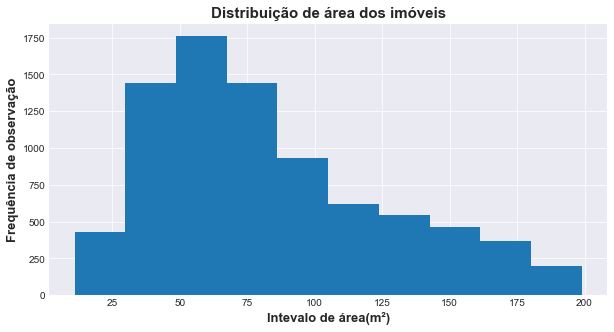

In [17]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-darkgrid')
plt.title('Distribuição de área dos imóveis', fontweight='bold', fontsize = 15)
plt.ylabel('Frequência de observação', fontweight='bold', fontsize=13)
plt.xlabel('Intevalo de área(m²)', fontweight='bold', fontsize=13)
plt.hist(df['area'])
plt.show()


**Análise do gráfico**

Podemos observar que o intervalo de área é mapeado através da largura das barras no eixo, e a frequência de valores em cada intervalo é mapeado pela altura das barras representadas pelo eixo y.

Observe que a distribuição dos dados se torna bem mais visível agora, isto é, podemos observar como os valores de área estão distribuidos entre si.

Na primeira barra temos um intervalo 0 a 25 m² com cerca de 400 valores nesse intervalo. Observe que dentro daquele intervalo ( que também não é muito bem definido no gráfico, mas podemos estimar entre 0 e 25m²) não é possível saber a quantidade exata de cada valor de área dentro dele, só podemos dizer que dentro desse intervalor há aproximadamente 400 valores. 

Em uma análise geral, observa-se que há poucas áreas com menos de 25m². Que a grande quantidade de área se concentra entre 50m² e 75m² e que após isso vai decaindo em quantidade conforme vai crescendo a área. Também é possível analisar que os terrenos mais raros estão entre 175 e 200m².

#### Como definir o número de intervalor(bins) do histograma

Quando usamos apenas o `.hist(df)` e não definimos o número de intervalo, o método define por padrão um valor que ele considera ideal.

Podemos definir a quantidade de intervalos acrescentando ao método o atributo e o valor para ele: `.hist(df, bins=numero_de_bins)`.

Observações:
- O número de bins diz o quão preciso é análise dos dados
    - Se for com poucos intervalos, a precisão será menor e a análise será mais generalizada
        - Hávera muitos valores nos pequenos intervalos
    - Se for com muitos, a precisão será maior, mas terá mais ruido e se tornara mais difícil fazer uma análise dos padrões
        - Poderá poucos valores nos muitos intervalos
- O número de bins pode ser definido por tentativa e erro, ou por fórmulas estatísticas

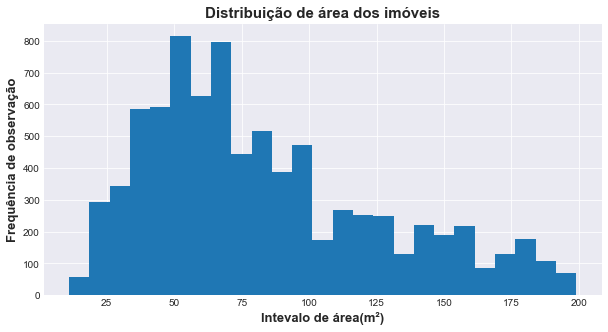

In [18]:
# Vamos definir 25 bins(25 intervalos)
plt.figure(figsize=(10,5))
plt.style.use('seaborn-darkgrid')
plt.title('Distribuição de área dos imóveis', fontweight='bold', fontsize = 15)
plt.ylabel('Frequência de observação', fontweight='bold', fontsize=13)
plt.xlabel('Intevalo de área(m²)', fontweight='bold', fontsize=13)
plt.hist(df['area'], bins=25)
plt.show()


## Gráficos de densidade com seaborn

O gráfico de densidade tem a mesma função de um histograma, representar a distribuição dos dados, mas faz isso através de um curva contínua ao invés de bins

A altura da curva não faz referência a contagem dos dados nos intervalos e sim a uma estimativa da probabilidade de um daqueles dados possuir o valor em x daquela estimativa. 

Faz um interpretação probabilistica dos dados. Nos dá uma visualização mais limpa que não depende dos bins

**Palavras chaves**
- Curva de probabilidade de ocorrência
    - Curva que indica a chance daquele intervalo de dados ocorrer
    - Probabilidade vai de 0 a 1 (0% a 100%)
    - É possível observar as regiões mais prováveis de ocorrência do evento
    - A curva é estimada pelo método **Estimativa de Densidade de Kernel (KDE)**
    
    


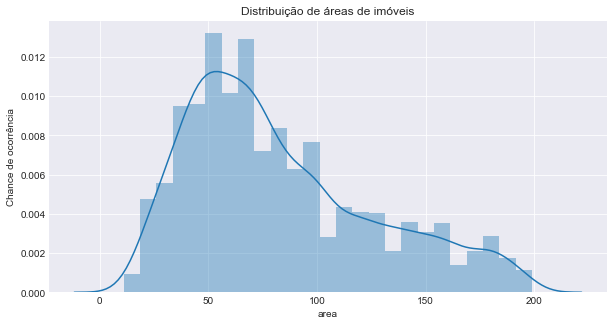

In [23]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de áreas de imóveis')
plt.xlabel('Intevalor de área(m²)')
plt.ylabel('Chance de ocorrência')
sns.distplot(df['area'], bins=25)
plt.show()

**Mostrando apenas a curva**

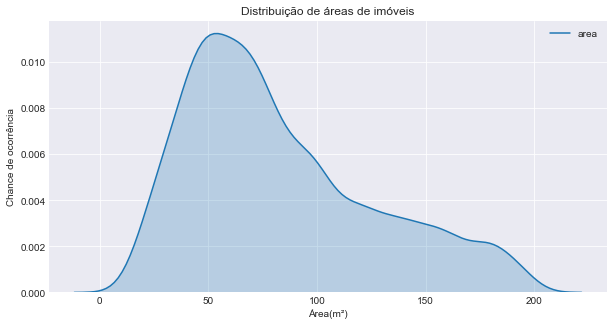

In [29]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de áreas de imóveis')
plt.xlabel('Área(m²)')
plt.ylabel('Chance de ocorrência')
sns.kdeplot(df['area'], shade=True)
plt.show()

**O atributo `shade` nos mostra uma sombra sob a curva. Quando definimos como `False`, é o padrão, apenas a curva fica visível**

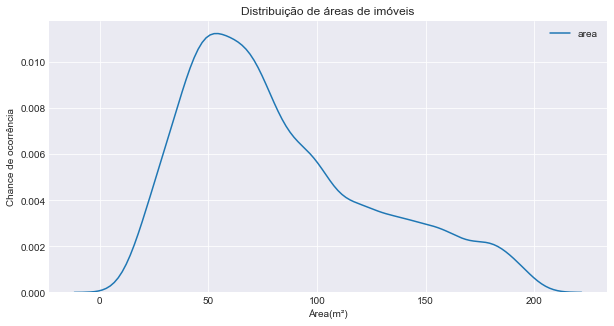

In [30]:
plt.figure(figsize=(10,5))
plt.title('Distribuição de áreas de imóveis')
plt.xlabel('Área(m²)')
plt.ylabel('Chance de ocorrência')
sns.kdeplot(df['area'])
plt.show()